<a href="https://colab.research.google.com/github/AngelTroncoso/comparacionDeML/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de Analisis de examenes de datos de pacientes a ser diagnosticados con diabetes o no.  
Las variables explicativas son todas las columnas excepto la de diabetes.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/desafios/diabetes.csv"
datos = pd.read_csv(url)
datos.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [2]:
X = datos.drop(columns="diabetes", axis=1)
y = datos.diabetes

In [3]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [4]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [5]:
from sklearn.model_selection import train_test_split

X,x_test,y,y_test = train_test_split(X,y,test_size=0.05,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [6]:
#sin delimitar el arbol de desicion
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de : {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de : 1.0
La exactitud del modelo con el conjunto de validacion es de: 0.6170212765957447


In [7]:
#evaluaremos el modelo proporcioando una profundidad para que no vaya al 1000 y lo aprenda de memoria
#la exactitud es un modelo que no dice mucho pues no sabemos con respecto a que es la medicion
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de : {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de : 0.9678571428571429
La exactitud del modelo con el conjunto de validacion es de: 0.648936170212766


### Evaluando el modelo

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[47 16]
 [17 14]]


In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

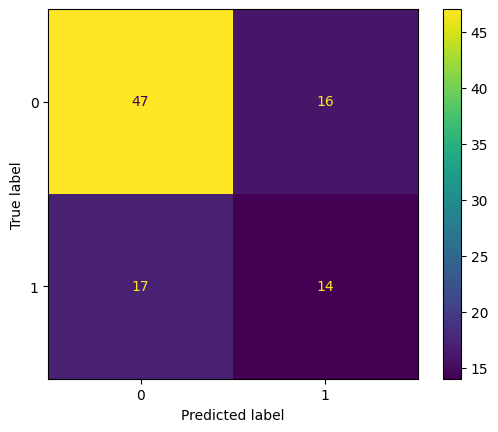

In [11]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot();

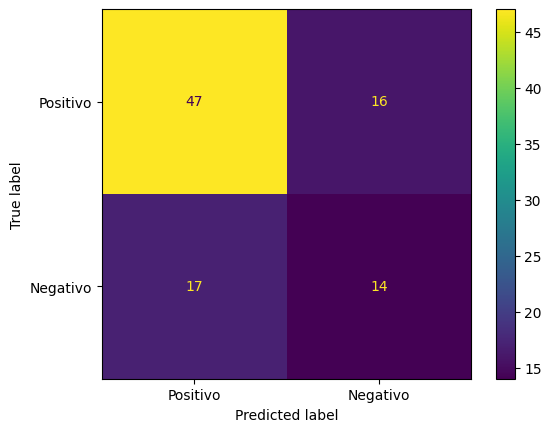

In [12]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Positivo','Negativo'])
visualizacion.plot();

#**Desafío: construyendo un segundo modelo**
Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo RandomForestClassifier. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

El primer paso es identificar cómo importar el algoritmo Random Forest a partir de la documentación, que siempre trae ejemplos de cómo utilizar la función. La importación se puede hacer con el siguiente código:

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Después de la importación de los algoritmos, podemos instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest:

In [14]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

Para hacer el ajuste de los modelos podemos usar el método fit() y para evaluar la tasa de acierto, el método score():

In [15]:
arbol.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {arbol.score(X_train, y_train)}')
print(f'Precisión de prueba: {arbol.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7571428571428571
Precisión de prueba: 0.776595744680851


In [16]:
random_forest.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {random_forest.score(X_train, y_train)}')
print(f'Precisión de prueba: {random_forest.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7357142857142858
Precisión de prueba: 0.6914893617021277


 Para generar la matriz de confusión, primero es necesario importar la función ConfusionMatrixDisplay, usando el código:

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

Hecho esto, basta con utilizar el método predict() para hacer la predicción de datos con los modelos y luego utilizar los valores reales y previstos en el método from_predictions() de la matriz de confusión:

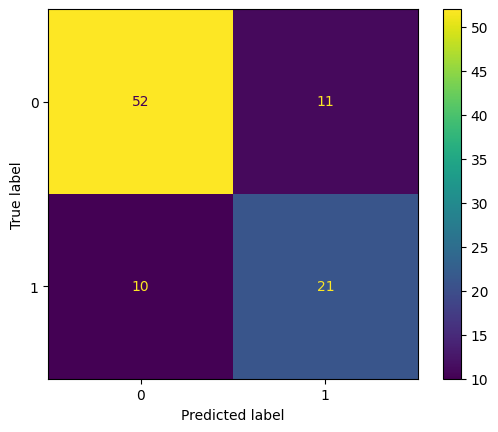

In [18]:
prediccion_arbol = arbol.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

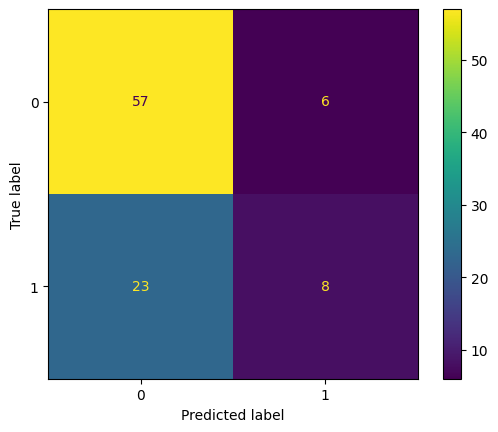

In [19]:
prediccion_rf = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [23]:
print(f'la presicion del modelo es:{precision_score(y_val,y_previsto)}')
print(f'la sencibilidad (RECALL) del modelo es:{recall_score(y_val,y_previsto)}')
print(f'la exactitud del modelo es:{accuracy_score(y_val,y_previsto)}')

la presicion del modelo es:0.4666666666666667
la sencibilidad (RECALL) del modelo es:0.45161290322580644
la exactitud del modelo es:0.648936170212766


In [24]:
#este factor penaliza mi modelo, si se acerca a 1 es bueno si se aleja es malo!!
print(f'El F1-Score del modelo es:{f1_score(y_val,y_previsto)}')

El F1-Score del modelo es:0.45901639344262296


### Curva ROC

In [20]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [25]:
from sklearn.metrics import RocCurveDisplay

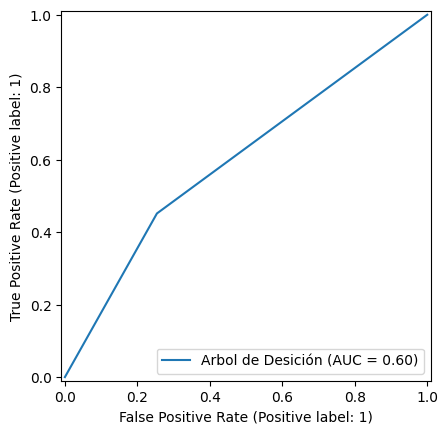

In [26]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name="Arbol de Desición");

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
print(f'El Area bajo la curva es: {roc_auc_score(y_val,y_previsto)}')

El Area bajo la curva es: 0.5988223246287763


### Curva de  precisión x sensibilidad

In [21]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [29]:
from sklearn.metrics import PrecisionRecallDisplay

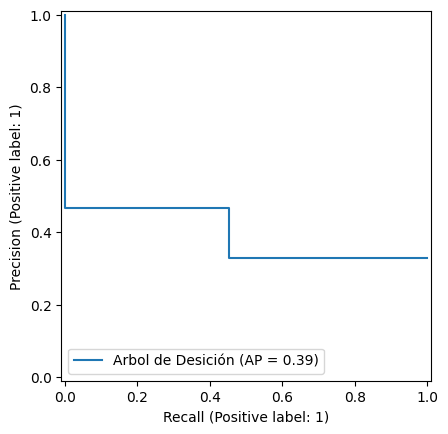

In [30]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name="Arbol de Desición");

In [31]:
from sklearn.metrics import average_precision_score

In [32]:
print(f'Score promedio de presicion vs recall es: {average_precision_score(y_val,y_previsto)}')

Score promedio de presicion vs recall es: 0.39160375200183023


### Informe de métricas

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        63
           1       0.47      0.45      0.46        31

    accuracy                           0.65        94
   macro avg       0.60      0.60      0.60        94
weighted avg       0.65      0.65      0.65        94



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [35]:
from sklearn.model_selection import KFold, cross_validate

In [36]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.00866055, 0.00628352, 0.00684237, 0.00689244, 0.00654602]),
 'score_time': array([0.00449252, 0.00437975, 0.00697708, 0.0042367 , 0.00452852]),
 'test_score': array([0.62666667, 0.66666667, 0.64      , 0.62666667, 0.68918919])}

In [37]:
cv_resultados['test_score']

array([0.62666667, 0.66666667, 0.64      , 0.62666667, 0.68918919])

In [38]:
#se requiere calcular el promedio y el desvio estandar
#intervalo de confianza peor y mejor desempeño
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvio tipico es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std} a {min(promedio+2*desvio_std,1)}')

El promedio de la exactitud es de: 0.6498378378378379
El desvio tipico es de: 0.02450439851593397
El intervalo de confianza es de: 0.60082904080597 a 0.6988466348697058


### Validación cruzada con sensibilidad

In [39]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El Intervalo de Confianza es de: {promedio-2*desvio_std} a {min(promedio+2*desvio_std,1)}'

In [40]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.01674199, 0.0058701 , 0.00547981, 0.01882792, 0.01128244]),
 'score_time': array([0.00709295, 0.00621533, 0.01827264, 0.01206565, 0.00842547]),
 'test_score': array([0.5       , 0.60869565, 0.40740741, 0.25      , 0.51724138])}

In [41]:
#intervalo de confianza de la metrica recall "sigue siendo deficiente, solo analizamos resultados."
intervalo_confianza(cv_resultados)

'El Intervalo de Confianza es de: 0.2136915691113927 a 0.6996462064452733'

### Estratificando los datos

In [43]:
datos['diabetes'].value_counts()

,count
diabetes,
0,264
1,130


In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.01943207, 0.01189899, 0.01253724, 0.01495957, 0.02211452]),
 'score_time': array([0.01666498, 0.01356125, 0.00945091, 0.01169491, 0.01380944]),
 'test_score': array([0.56      , 0.44      , 0.4       , 0.29166667, 0.625     ])}

In [46]:
intervalo_confianza(cv_resultados)

'El Intervalo de Confianza es de: 0.22752738674918868 a 0.6991392799174778'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [47]:
datos['diabetes'].value_counts(normalize = True)

,proportion
diabetes,
0,0.670051
1,0.329949


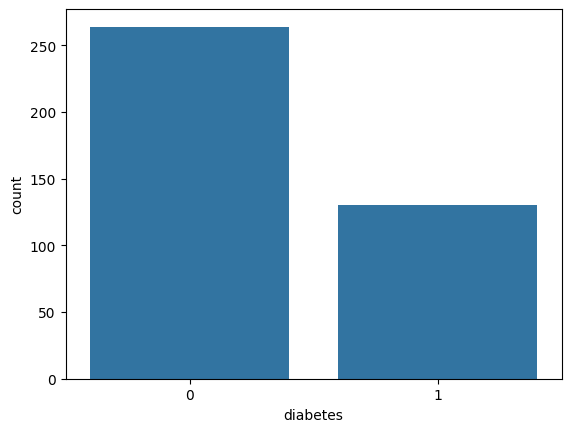

In [49]:
#Otra forma de analizar es a través de un gráfico. Podemos usar el countplot() de la biblioteca seaborn:
import seaborn as sns

sns.countplot(datos, x = 'diabetes');

In [50]:
#El primer paso es importar el método Pipeline y el SMOTE para balancear los datos:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de oversampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

### Pipeline para validación

In [52]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.6097465992844001


In [54]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.5912751696997349


In [55]:
# El primer paso es importar el método Pipeline y el NearMiss para balancear los datos:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de undersampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [57]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5449681473471796


In [58]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6057705722151725


El modelo que obtuvo mayor rendimiento en las pruebas del desafío fue el RandomForest, usando el max_depth = 2 en la estrategia de undersampling. Por lo tanto, vamos a balancear los datos y utilizar este modelo en todos los datos balanceados. Por último, vamos a validar el modelo en datos de prueba, no vistos hasta ahora:

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



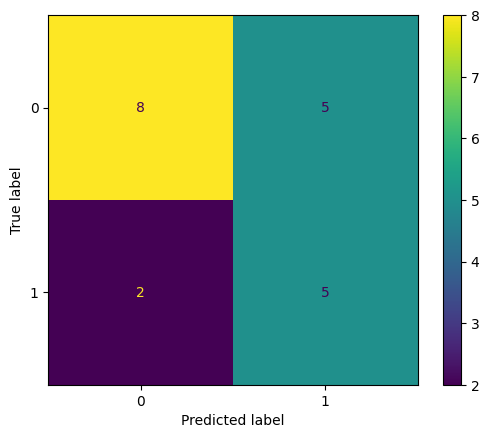

In [60]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);